In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('BNB.csv',sep=";")
df1=df.reset_index()['Price']

In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
# 4. Chia train test
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [5]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [8]:
# 8. Define GRU Model

model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
# Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
16/16 [==============================] - 3s 71ms/step - loss: 0.0203 - val_loss: 0.0494
Epoch 2/100
16/16 [==============================] - 1s 44ms/step - loss: 0.0033 - val_loss: 0.0080
Epoch 3/100
16/16 [==============================] - 1s 47ms/step - loss: 8.6845e-04 - val_loss: 0.0013
Epoch 4/100
16/16 [==============================] - 1s 48ms/step - loss: 4.5917e-04 - val_loss: 0.0011
Epoch 5/100
16/16 [==============================] - 1s 46ms/step - loss: 3.8524e-04 - val_loss: 0.0016
Epoch 6/100
16/16 [==============================] - 1s 44ms/step - loss: 3.7701e-04 - val_loss: 0.0012
Epoch 7/100
16/16 [==============================] - 1s 54ms/step - loss: 3.8616e-04 - val_loss: 0.0013
Epoch 8/100
16/16 [==============================] - 1s 46ms/step - loss: 3.5317e-04 - val_loss: 0.0017
Epoch 9/100
16/16 [==============================] - 1s 46ms/step - loss: 3.5333e-04 - val_loss: 0.0013
Epoch 10/100
16/16 [==============================] - 1s 45ms/step - los

Epoch 78/100
16/16 [==============================] - 1s 40ms/step - loss: 2.5787e-04 - val_loss: 6.7355e-04
Epoch 79/100
16/16 [==============================] - 1s 43ms/step - loss: 2.8288e-04 - val_loss: 6.7765e-04
Epoch 80/100
16/16 [==============================] - 1s 52ms/step - loss: 2.4741e-04 - val_loss: 0.0011
Epoch 81/100
16/16 [==============================] - 1s 45ms/step - loss: 2.3288e-04 - val_loss: 7.2994e-04
Epoch 82/100
16/16 [==============================] - 1s 47ms/step - loss: 2.1966e-04 - val_loss: 7.5770e-04
Epoch 83/100
16/16 [==============================] - 1s 45ms/step - loss: 2.3975e-04 - val_loss: 6.6183e-04
Epoch 84/100
16/16 [==============================] - 1s 45ms/step - loss: 2.4269e-04 - val_loss: 9.4214e-04
Epoch 85/100
16/16 [==============================] - 1s 44ms/step - loss: 2.2089e-04 - val_loss: 8.6332e-04
Epoch 86/100
16/16 [==============================] - 1s 50ms/step - loss: 2.2743e-04 - val_loss: 6.5670e-04
Epoch 87/100
16/16 [===

In [10]:
# Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

3/3 [==============================] - 0s 12ms/step


In [11]:
# calculate the RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# calculate the MAPE
valid_mape = np.mean(np.abs((yval - y_pred_val) / yval)) * 100
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
print("Validation MAPE:", valid_mape)
print("Testing MAPE:", test_mape)

# calculate the MAE
valid_mae = np.mean(np.abs(y_pred_val - yval))
test_mae = np.mean(np.abs(y_pred - ytest))
print("Validation MAE:", valid_mae)
print("Testing MAE:", test_mae)

Validation RMSE: 0.034151133469982733
Testing RMSE: 0.22640791155813197
Validation MAPE: 5.976529496173116
Testing MAPE: 34.43194891177582
Validation MAE: 0.02708373009410687
Testing MAE: 0.18094559704815572


In [12]:
# Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

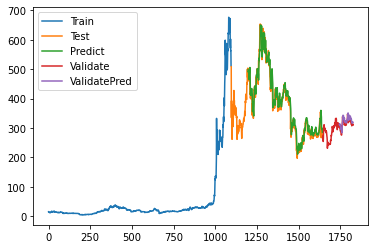

In [13]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
plt.legend(['Train','Test','Predict','Validate','ValidatePred'])
plt.show()